In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [39]:
# Load the CSV dataset
data = pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2024,0.0,12.8,5.0,4.7,drizzle
1,02-01-2024,10.9,10.6,2.8,4.5,rain
2,03-01-2024,0.8,11.7,7.2,2.3,rain
3,04-01-2024,20.3,12.2,5.6,4.7,rain
4,05-01-2024,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-2027,8.6,4.4,1.7,2.9,rain
1457,28-12-2027,1.5,5.0,1.7,1.3,rain
1458,29-12-2027,0.0,7.2,0.6,2.6,fog
1459,30-12-2027,0.0,5.6,-1.0,3.4,sun


In [47]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce') 
    data = data.drop(columns=['date'])

In [49]:
missingvalue = data.isnull().sum()
print(missingvalue)

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [51]:
label_encoder = LabelEncoder()
data['weather'] = label_encoder.fit_transform(data['weather'])

In [53]:
scaler = MinMaxScaler()
num_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
data[num_cols] = scaler.fit_transform(data[num_cols])

In [55]:
X=data.drop('weather',axis=1)
y=data['weather']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') 
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [73]:
y_pred = model.predict(X_test)
y_pred

array([4, 2, 4, 0, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 3, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 1, 2, 3, 2, 4, 4, 2, 4, 2,
       2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4,
       2, 2, 1, 4, 2, 2, 1, 4, 2, 4, 1, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2,
       0, 4, 0, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2,
       2, 2, 2, 4, 0, 2, 4, 2, 2, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 2, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 1, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4,
       2, 4, 4, 2, 4, 2, 4])

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Model Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

     drizzle       0.17      0.11      0.13         9
         fog       0.40      0.08      0.13        25
        rain       0.95      0.92      0.93       120
        snow       0.50      0.25      0.33         8
         sun       0.77      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.56      0.46      0.48       293
weighted avg       0.78      0.82      0.78       293



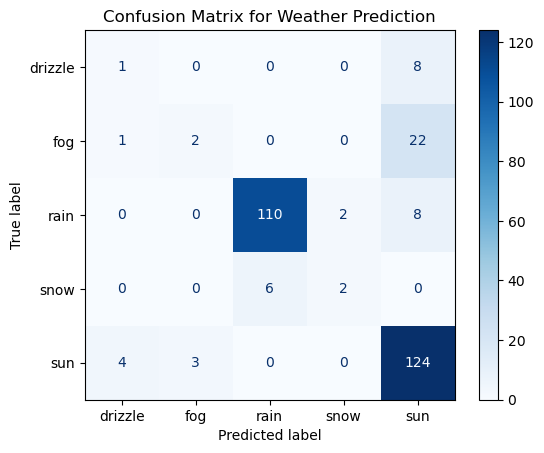

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Weather Prediction")
plt.show()

In [85]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8156996587030717

In [89]:
import joblib

# Save the trained model
joblib.dump(model, 'weather_prediction_model.pkl')

print("weather_prediction_model.pkl")

weather_prediction_model.pkl


In [91]:
# Load the saved model
loaded_model = joblib.load('weather_prediction_model.pkl')

# Example: Predict weather for a new sample (replace values with actual test data)
sample_input = [[0.2, 15, 5, 3]]  

# Make prediction
y_pred = loaded_model.predict(sample_input)

# Convert prediction back to original weather label
predicted_weather = label_encoder.inverse_transform(y_pred)

print("Predicted Weather:", predicted_weather[0])


Predicted Weather: rain


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
